In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
def root(f, df, args=(), init_guess=0, eps=1e-6):
    alg1 = False

    if alg1:
        x_next = init_guess

        while np.abs(f(x_next, *args) - 0) > eps:
            # if we divide by 0, add perturbation
            while np.abs(df(x_next, *args) - 0) < eps:
                x_next = (x_next - 1e-2)*1.1
            
            x_next = x_next - f(x_next, *args)/df(x_next, *args)

        return x_next
    
    x2 = init_guess
    x1 = -10000
    f2 = f(0, *args)
    f1 = f(x1, *args)
    if f1*f2 > 0:
        raise Exception()

    x = (x1 + x2) / 2
    while np.abs(f(x, *args) - 0) > eps:
        if f(x, *args) > 0:
            x2 = x
        else:
            x1 = x
        x = (x1 + x2) / 2
    
    return x

## Q1

In [ ]:
t = np.linspace(-10,10,200)

def get_time_diff(x, v):
    return (1/(1-v**2))*(-(v**2)*t+np.sqrt(t**2 + (1-v**2)*(x**2-t**2)))

plt.figure(dpi=150)
plt.plot(t, get_time_diff(x=0.1, v=0.1), label="x=0.1")
plt.plot(t, get_time_diff(x=1, v=0.1), label="x=1")
plt.plot(t, get_time_diff(x=10, v=0.1), label="x=10")
plt.xlabel("t")
plt.ylabel(r"t-$t_{ret}\left(t\right)$")
plt.legend()
plt.grid()
plt.savefig("figures/q1_v01.png")
plt.show()

plt.figure(dpi=150)
plt.plot(t, get_time_diff(x=0.1, v=0.9), label="x=0.1")
plt.plot(t, get_time_diff(x=1, v=0.9), label="x=1")
plt.plot(t, get_time_diff(x=10, v=0.9), label="x=10")
plt.xlabel("t")
plt.ylabel(r"t-$t_{ret}\left(t\right)$")
plt.legend()
plt.grid()
plt.savefig("figures/q1_v09.png")
plt.show()

## Q2

In [ ]:
x = np.linspace(-10,10,200)
c = 1

def get_plot_for_w(w):
    def t_ret(x,y):
        def f(t):
            return (np.cos(w*t)-x)**2+(np.sin(w*t)-y)**2 - (c*t)**2
        def df(t):
            return 2*w*(x*np.sin(w*t)-y*np.cos(w*t)) - 2*(c**2)*t  

        return root(f, df, init_guess=-10)

    t_ret_all = np.array([t_ret(xi,0) for xi in x])

    plt.figure(dpi=150)
    plt.plot(x, t_ret_all)
    plt.ylabel(r"$t_{ret}\left(x,0\right)$")
    plt.xlabel("x")
    plt.grid()
    plt.savefig(f"figures/q2_{w}.png")
    plt.show()
    
get_plot_for_w(0.1)
get_plot_for_w(0.9)

## Q3

In [4]:
x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
X, Y = np.meshgrid(x, y, indexing='ij')
t = 0
c = 1
h = 200 / len(x)
q = 1 / (h ** 2)


In [ ]:
def plot_q3(phi, w):
    plt.figure(dpi=250)
    plt.imshow(np.log(phi), extent=[-100, 100, -100, 100])
    plt.colorbar(label=r'$\log\left(\Phi\right)$')
    plt.ylabel("y")
    plt.xlabel("x")
    plt.savefig(f"figures/q3_{w}.png")
    plt.show()

In [5]:
def f(tret, x, y, w, t):
    return (np.cos(w*tret)-x)**2+(np.sin(w*tret)-y)**2 - c**2 * (t-tret)**2
def df(t, x, y, w):
    # return 2*w*(x*np.sin(w*t)-y*np.cos(w*t)) - 2*(c**2)*t
    raise Exception()

def t_ret_for_w(w, x, y, t):
    def t_ret(x,y,t):
        t_init = t
        res = 1
        while res > 0:
            t_init = t_init*1.2
            res = root(f, df, (x,y,w,t), init_guess=t_init)

        return res

    tret = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            tret[i,j] = t_ret(x[i], y[j], t)
            if (tret[i,j] > 0):
                raise Exception()

    return tret


In [ ]:
def lienard_wiechert_potential(w,x,y,tret):
        x1 = np.cos(w*tret)
        y1 = np.sin(w*tret)
        vx1 = -w*np.sin(w*tret)
        vy1 = w*np.cos(w*tret)
        R = np.sqrt((x - x1)**2+(y - y1)**2)
        Rv = (x - x1)*vx1 + (y - y1)*vy1
        return (q*c) / (R*c - Rv)

In [6]:
tret02 = t_ret_for_w(0.2, x, y, 0)

In [ ]:
phi_w02 = lienard_wiechert_potential(0.2, X, Y, tret02)

In [ ]:
plot_q3(phi_w02, 0.2)

In [7]:
tret09 = t_ret_for_w(0.9, x, y, 0)

In [ ]:
phi_w09 = lienard_wiechert_potential(0.9, X, Y, tret09)

In [ ]:
plot_q3(phi_w09, 0.9)

## Q4

In [8]:
def lienard_wiechert_field(w, x, y, tret):
    x1 = np.cos(w*tret)
    y1 = np.sin(w*tret)
    vx1 = -w*np.sin(w*tret)
    vy1 = w*np.cos(w*tret)
    ax1 = -w**2 * np.cos(w*tret)
    ay1 = -w**2 * np.sin(w*tret)
    v = np.sqrt(vx1**2 + vy1**2)
    Rx = x - x1
    Ry = y - y1
    R = np.sqrt(Rx**2+Ry**2)
    Rv = Rx*vx1 + Ry*vy1
    wx = c*(Rx/R) - vx1
    wy = c*(Ry/R) - vy1
    Rw = Rx*wx + Ry*wy + Rx*wx
    wxa_x = 0
    wxa_y = 0
    wxa_z = wx*ay1-wy*ax1
    Rxwxa_x = Ry*wxa_z
    Rxwxa_y = -Rx*wxa_z
    Rxwxa_z = 0

    Ex = (q*R)/((Rw)**3) * ((c**2-v**2)*wx+Rxwxa_x)
    Ey = (q*R)/((Rw)**3) * ((c**2-v**2)*wy+Rxwxa_y)

    return Ex,Ey

In [56]:
def plot_field(X, Y, Ex, Ey, label):
    Ex_norm = Ex/np.sqrt((Ex**2+Ey**2))
    Ey_norm = Ey/np.sqrt((Ex**2+Ey**2))
    # Ex_masked = np.array(Ex_norm)
    # Ey_masked = np.array(Ey_norm)
    # Ex_masked[X**2+Y**2 < 30] = 0
    # Ey_masked[X**2+Y**2 < 30] = 0
    plt.figure(dpi=300)
    plt.quiver(X, Y, Ex_norm, Ey_norm, scale_units='inches', scale=13, width=0.002)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig(f'figures/{label}.png')
    plt.show()

In [26]:
tret02_trim = tret02[::3,::3]
tret09_trim = tret09[::3,::3]
X_trim = X[::3,::3]
Y_trim = Y[::3,::3]

In [16]:
Ex02,Ey02 = lienard_wiechert_field(0.2, X_trim, Y_trim, tret02_trim)

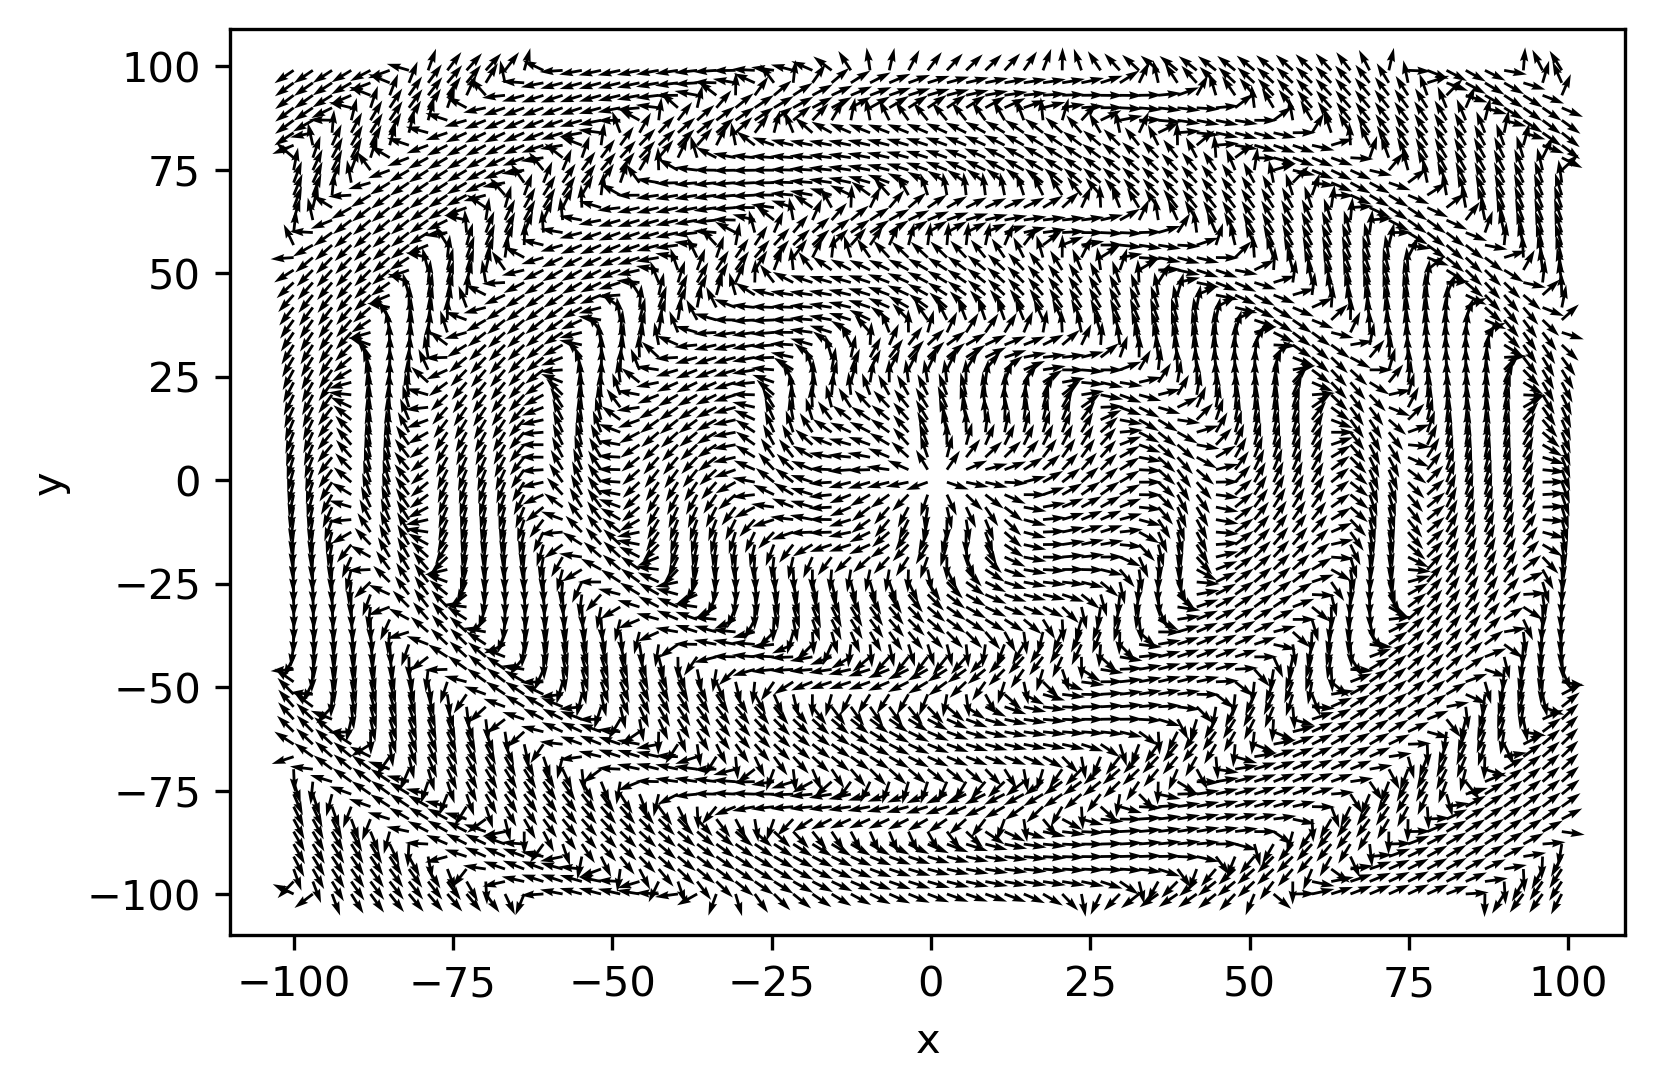

In [57]:
plot_field(X_trim, Y_trim, Ex02, Ey02, "q4_02_ff")

In [46]:
Ex09,Ey09 = lienard_wiechert_field(0.9, X_trim, Y_trim, tret09_trim)

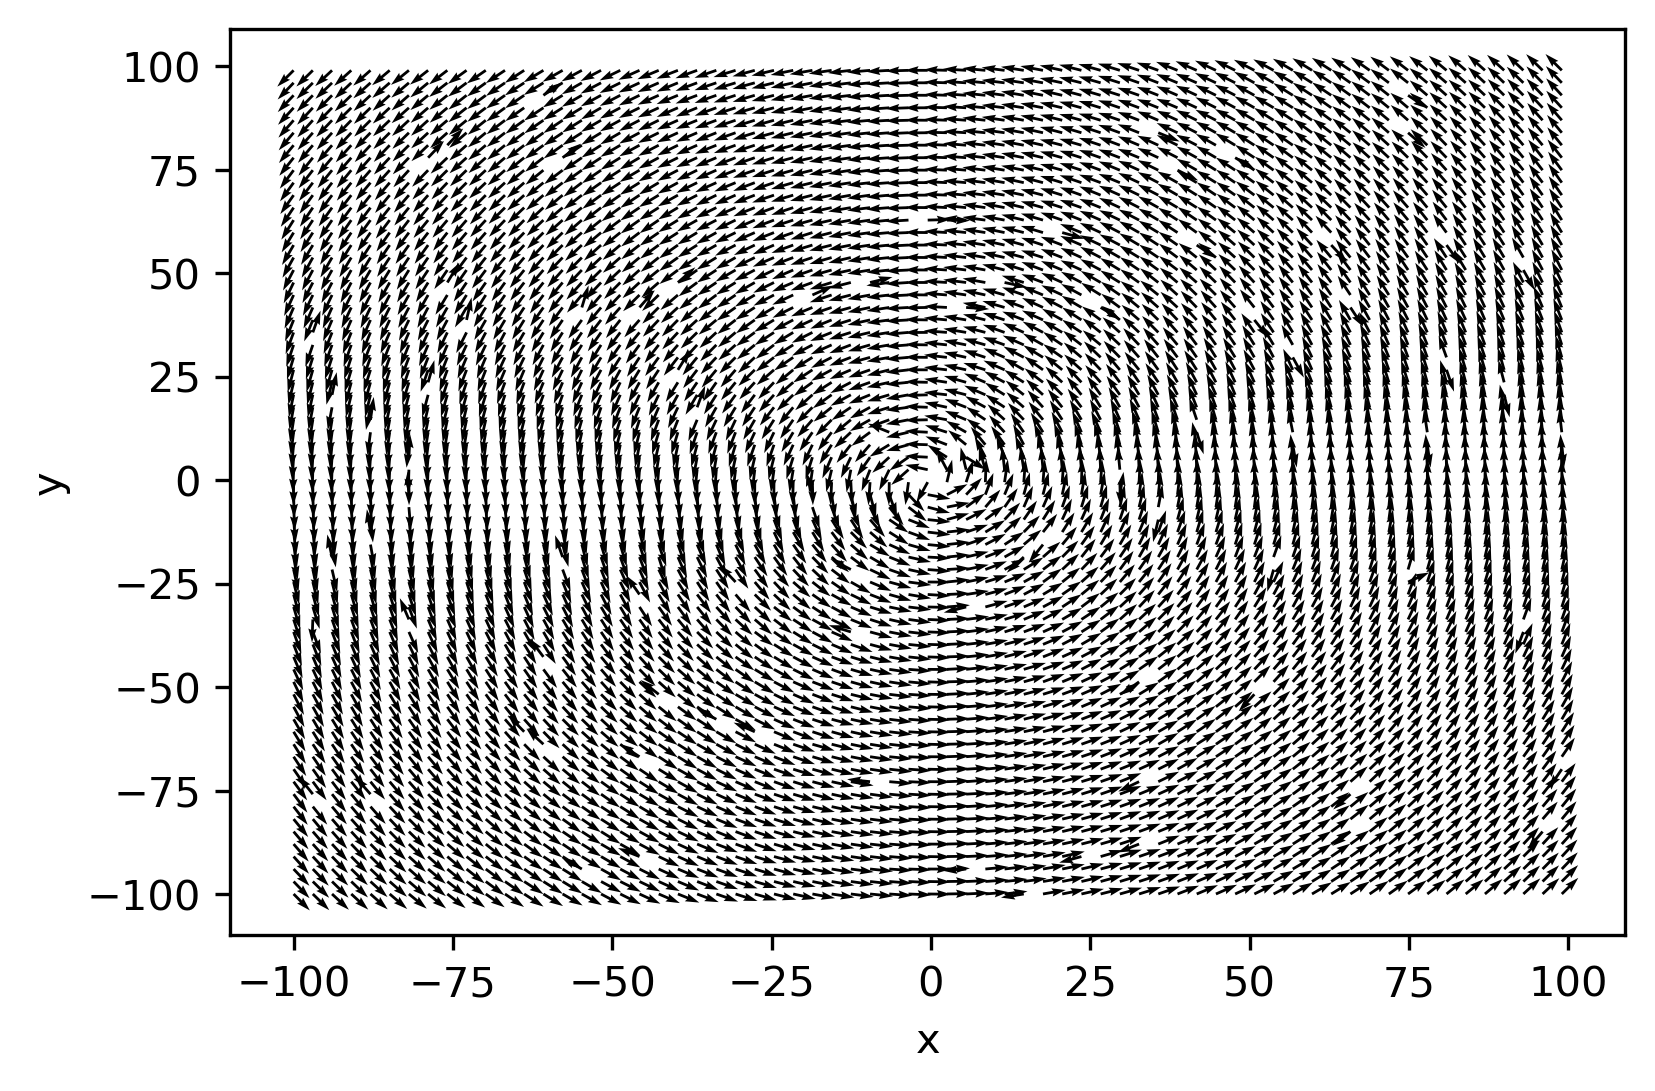

In [58]:
plot_field(X_trim, Y_trim, Ex09, Ey09, "q4_09_ff")

In [70]:
x_nf = np.linspace(-10,10,50)
y_nf = np.linspace(-10,10,50)

X_nf, Y_nf = np.meshgrid(x_nf, y_nf, indexing='ij')

In [71]:
tret09_nf = t_ret_for_w(0.9, x_nf, y_nf, 0)

In [72]:
Ex09_nf,Ey09_nf = lienard_wiechert_field(0.9, X_nf, Y_nf, tret09_nf)

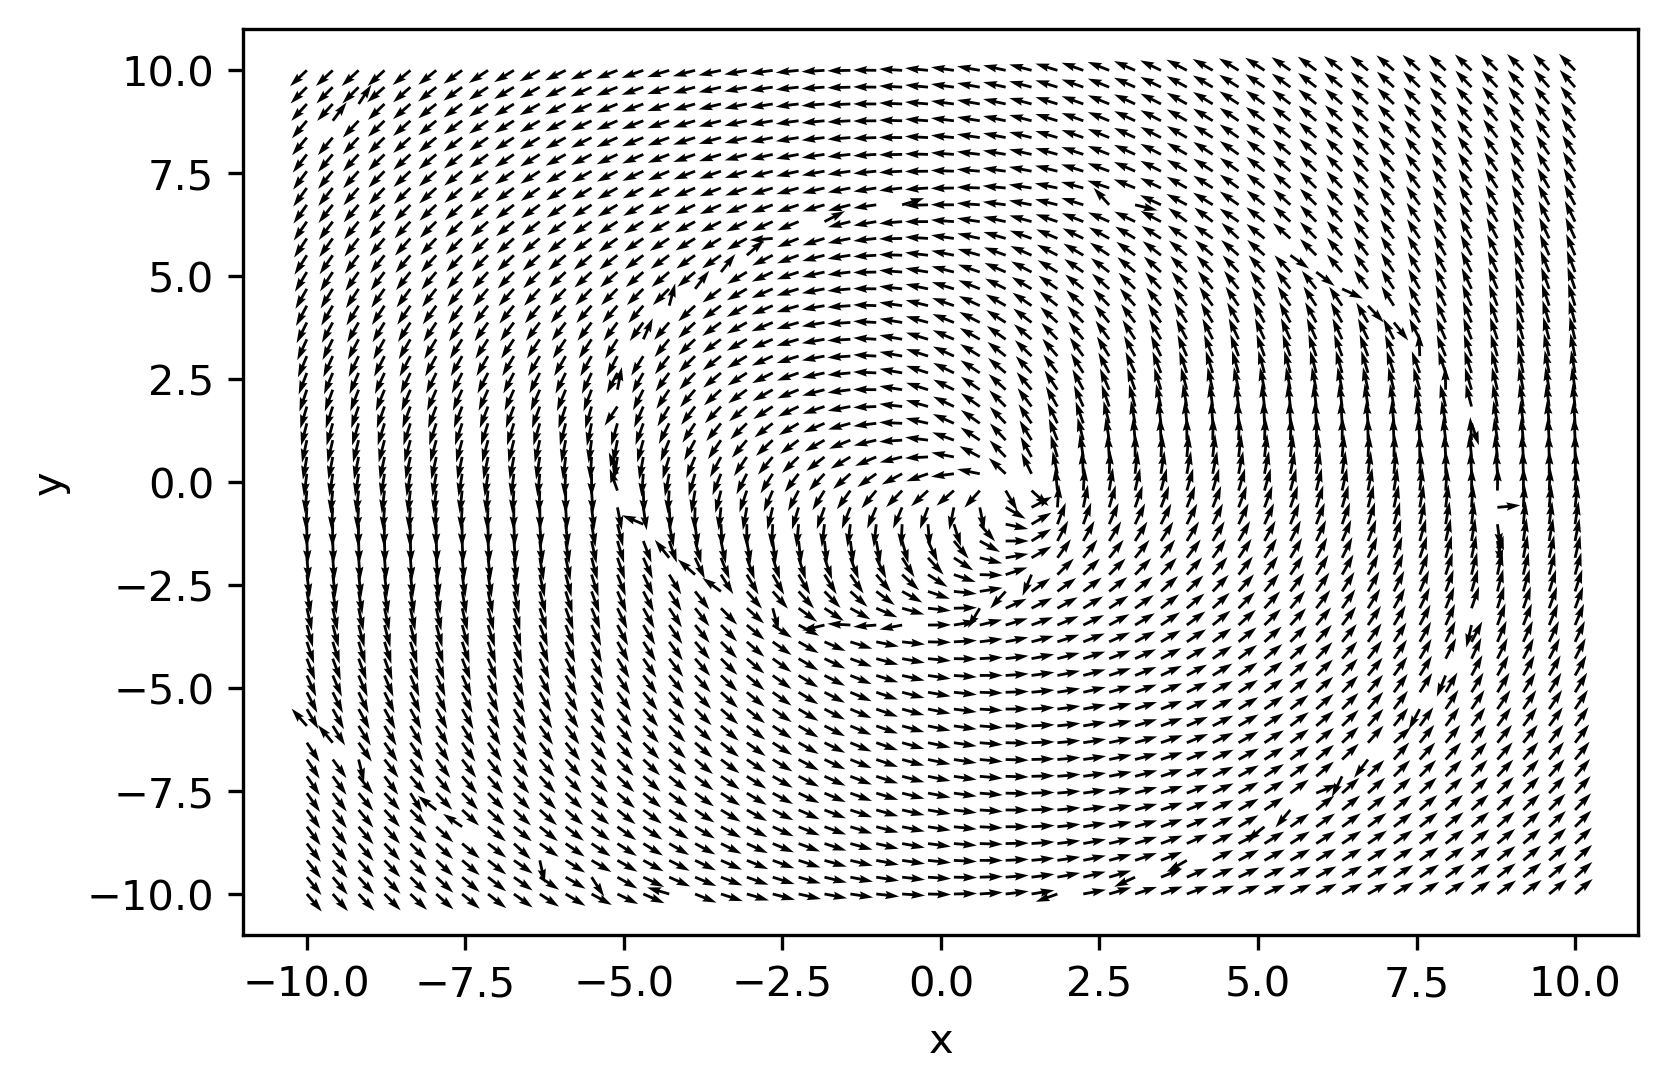

In [73]:
plot_field(X_nf, Y_nf, Ex09_nf, Ey09_nf, "q4_09_nf")

In [63]:
tret02_nf = t_ret_for_w(0.2, x_nf, y_nf, 0)

In [64]:
Ex02_nf,Ey02_nf = lienard_wiechert_field(0.2, X_nf, Y_nf, tret02_nf)

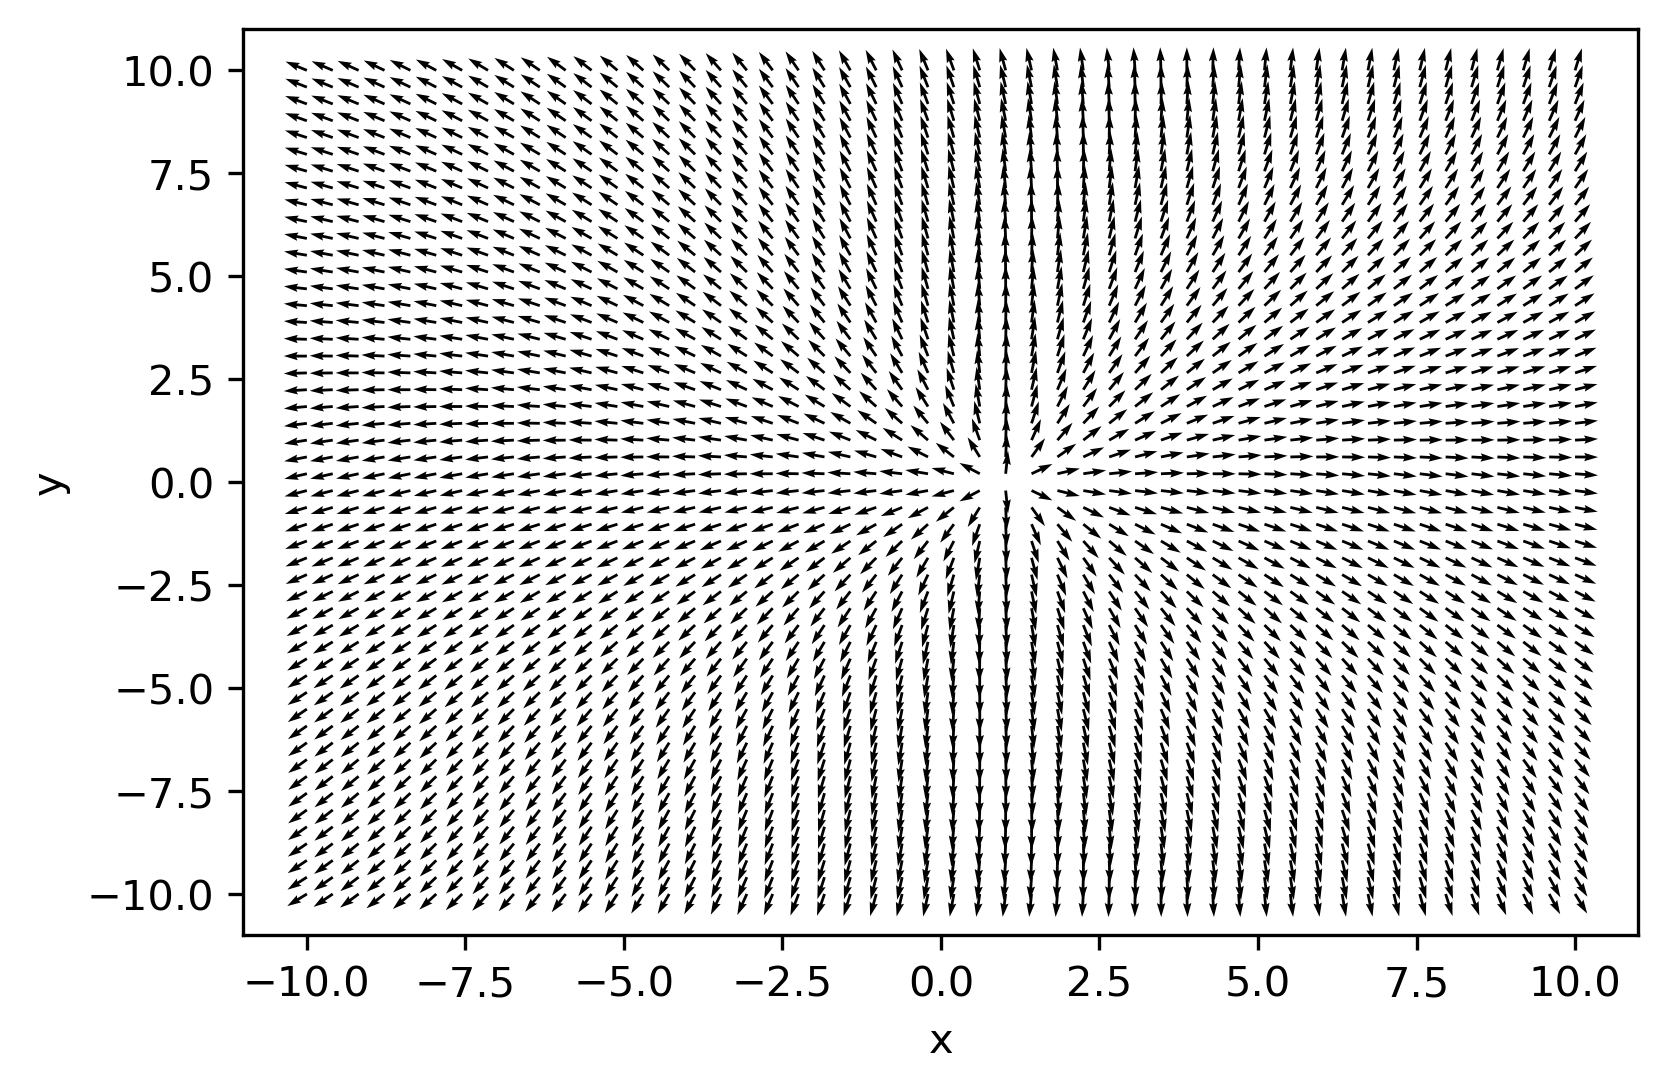

In [65]:
plot_field(X_nf, Y_nf, Ex02_nf, Ey02_nf, "q4_02_nf")

## Q5

In [5]:
N = 5
T = 2*np.pi / 0.2
t = np.linspace(0, N*T, 9*N)

In [6]:
tret02_t = []
for ti in tqdm(t):
    tret02_t + [t_ret_for_w(0.2, x, y, ti)]
tret02_t = np.array(tret02_t)

  0%|          | 0/45 [00:00<?, ?it/s]

Exception: 

In [7]:
tret09_t = np.array([t_ret_for_w(0.9, x, y, ti) for ti in tqdm(t)])

  0%|          | 0/45 [00:00<?, ?it/s]

Exception: 